<a href="https://colab.research.google.com/github/LizcanoJuan1010/Machine-Learning-Projects/blob/main/Genetic_algoritm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Taller
* Juan Lizcano
* David Santiago
* Maria Del Corral

In [ ]:
!pip install deap

In [ ]:
import matplotlib.pyplot as plt
import time
import numpy as np
from IPython import display
import random
from deap import base, creator, tools, algorithms

In [ ]:
def mostrar_laberinto():
    ax = plt.gca();
    ax.set_xticks(np.arange(0, 10, 1));
    ax.set_yticks(np.arange(0, 10, 1));
    #ax.set_xticklabels(np.arange(0, 10, 1));
    #ax.set_yticklabels(np.arange(0, 10, 1));
    ax.imshow(laberinto, cmap='binary')
    plt.gca().invert_yaxis()
    plt.plot(inicio[0], inicio[1], "ro", label="Inicio")
    plt.plot(salida[0], salida[1], "go", label="Salida")
    plt.grid(True, which='both')
    plt.legend()
    plt.show()


def mover(pos, movimiento):
    # Realiza el movimiento (x, y)
    nueva_pos = (pos[0] + movimiento[0], pos[1] + movimiento[1])

    # Verificar si está dentro de los límites y no es una pared
    if 0 <= nueva_pos[0] < laberinto.shape[0] and 0 <= nueva_pos[1] < laberinto.shape[1]:
        if laberinto[nueva_pos] == 0:  # No es una pared
            return nueva_pos
    return pos  # Si no es un movimiento válido, quedarse en el mismo lugar

# Definir la función de aptitud
def evaluar_individuo(individual):
    pos = inicio
    for movimiento in individual:
        pos = mover(pos, MOVIMIENTOS[movimiento])

    # Distancia a la salida
    dist_salida = np.sqrt((pos[0] - salida[0])**2 + (pos[1] - salida[1])**2)
    return dist_salida,  # Cuanto más cerca de 0, mejor

def mostrar_ruta_pasos(individuo, s=0.01,laberinto=None, inicio=None, salida=None, grid=False):
    generacion = individuo if isinstance(individuo[0], list) else [individuo]

    NOMBRE_MOVIMIENTOS = ['arriba', 'abajo', 'izquierda', 'derecha']
    #pos = inicio
    #camino = [pos]
    #nombre_camino = ['nada']
    #numero_movimiento = ['-']

    # Clear the previous plot
    plt.clf()


    fig, ax = plt.subplots()
    #ax.invert_yaxis()
    for ind in generacion:
        pos = inicio
        camino = [pos]
        for i, movimiento in enumerate(ind):
            pos = mover(pos, MOVIMIENTOS[movimiento])

            camino.append(pos)
            #nombre_camino.append(NOMBRE_MOVIMIENTOS[movimiento])
            #numero_movimiento.append(movimiento)

            # Convert to NumPy array for plotting
            camino_np = np.array(camino)


            # Plot the path up to the current step
            ax.clear()
            if grid:
              ax.set_xticks(np.arange(0, laberinto.shape[1], 1));
              ax.set_yticks(np.arange(0, laberinto.shape[1], 1));
              #ax.set_xticklabels(np.arange(0, 10, 1));
              #ax.set_yticklabels(np.arange(0, 10, 1));
              ax.grid(grid, which='both')
            ax.set_ylim(-1, laberinto.shape[1])
            ax.set_xlim(-1, laberinto.shape[0])
            ax.imshow(laberinto.T, cmap='binary')
            ax.plot(camino_np[:, 0], camino_np[:, 1], "r-")
            ax.plot(-1, -1, "ro", label=f"{i+1}")
            ax.plot(inicio[0], inicio[1], "bo", label="Inicio")  # Start point
            ax.plot(salida[0], salida[1], "go", label="Salida")   # End point
            #ax.plot(pos_anterior[0], pos_anterior[1], "bo", label=f"pos-ant {pos_anterior}", alpha=0.6)   # End point
            ax.plot(pos[0], pos[1], "bx", label=f"pos {pos}")   # End point
            plt.xlabel("Eje X")
            plt.ylabel("Eje Y")

            ax.legend()

            # Update the display

            display.clear_output(wait=True)
            display.display(fig)

            time.sleep(s)
    plt.close(fig)  # Close the figure to prevent further updates
    #plt.show()  # Keep the final plot displayed

In [ ]:


# Representamos el laberinto como una matriz 10x10
laberinto = np.zeros((10, 10))
# Poner paredes (1 representa una pared)
laberinto[0:9, 5] = 1  # Pared vertical
laberinto[5, 1:5] = 1  # Pared horizontal
#laberinto = laberinto.T

# Definir la posición inicial y final
inicio = (0, 0)
salida = (9, 9)

# Mostrar el laberinto
mostrar_laberinto()

In [ ]:
# Movimientos posibles
#              (arriba, abajo, izquierda, derecha)
MOVIMIENTOS = [(0, 1), (0, -1), (-1, 0), (1, 0)]

# Crear la estructura del algoritmo genético
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # Minimizar la distancia
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_move", random.randint, 0, len(MOVIMIENTOS)-1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_move, n=50)  # 50 movimientos
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluar_individuo)


In [ ]:
# Crear la población inicial
pop = toolbox.population(n=10)  # 100 individuos

# Ejecutar el algoritmo genético
resultados, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, verbose=False)

In [ ]:
mostrar_ruta_pasos(resultados[0], laberinto=laberinto, inicio=inicio, salida=salida, grid=True)

In [ ]:
from deap import tools
# Variables para el registro de la evolución
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)

logbook = tools.Logbook()

# Crear la población inicial
pop = toolbox.population(n=100)  # 100 individuos

# Ejecutar el algoritmo genético
resultados, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=50,stats=stats, verbose=False)

# Encontrar el mejor individuo
mejor_individuo = tools.selBest(pop, 1)#[0]
mostrar_ruta_pasos(mejor_individuo, laberinto=laberinto, inicio=inicio, salida=salida, grid=True)

In [ ]:
# Extraer las estadísticas de cada generación
generaciones = logbook.select("gen")
minimos = logbook.select("min")
promedios = logbook.select("avg")

# Graficar la evolución
import matplotlib.pyplot as plt

plt.plot(generaciones, minimos, label="Mejor aptitud")
plt.plot(generaciones, promedios, label="Aptitud promedio", linestyle="--")
plt.xlabel("Generaciones")
plt.ylabel("Aptitud")
plt.title("Evolución del Algoritmo Genético")
plt.legend()
plt.show()

#Taller Algoritmo Genetico

In [ ]:
# Crear un laberinto de 10x10
laberinto = np.zeros((20, 20))
inicio = (0, 0)
salida = (0, 19)

for i in range(1, 19, 4):
    laberinto[0:19,i] = 1
for i in range(3, 20, 4):
    laberinto[1:20,i] = 1

In [ ]:
def mostrar_laberinto():
    ax = plt.gca();
    ax.set_xticks(np.arange(0, 20, 1));
    ax.set_yticks(np.arange(0, 20, 1));
    #ax.set_xticklabels(np.arange(0, 10, 1));
    #ax.set_yticklabels(np.arange(0, 10, 1));
    ax.imshow(laberinto, cmap='binary')
    plt.gca().invert_yaxis()
    plt.plot(inicio[0], inicio[1], "ro", label="Inicio")
    plt.plot(salida[0], salida[1], "go", label="Salida")
    plt.grid(True, which='both')
    plt.legend()
    plt.show()


In [ ]:
mostrar_laberinto()

In [ ]:
def evaluar_individuo(individual):
    pos = inicio
    for movimiento in individual:
        pos = mover(pos, MOVIMIENTOS[movimiento])

    # Distancia a la salida
    dist_salida = np.sqrt((pos[0] - salida[0])**2 + (pos[1] - salida[1])**2)
    # Inversa de la distancia al inicio (para maximizarla al minimizar)
    dist_inicio = 1 / (np.sqrt((pos[0] - inicio[0])**2 + (pos[1] - inicio[1])**2) + 1e-10)  #Evita división por 0

    return dist_salida,dist_inicio  # Cuanto más cerca de 0, mejor


    ####En caso de que queramos tener ambas cosas aqui se deberia modificar

In [ ]:
# Movimientos posibles
#              (arriba, abajo, izquierda, derecha)
MOVIMIENTOS = [(0, 1), (0, -1), (-1, 0), (1, 0)]

# Crear la estructura del algoritmo genético
creator.create("FitnessMultiObj", base.Fitness, weights=(-1,-1))  # Minimizar la distancia ////AQUI VOY A CREAR 2 COSAS MINIMIZAR DISTNACIA SALIDA Y MAXIMIZAR LA DISTANCIA DEL INICIO SERIA creator.create("FitnessMultiObj", base.Fitness, weights=(-1.0, 1.0))
creator.create("Individual", list, fitness=creator.FitnessMultiObj)

toolbox = base.Toolbox()
toolbox.register("attr_move", random.randint, 0, len(MOVIMIENTOS)-1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_move, n=200)  # 50 movimientos
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.1)
toolbox.register("select", tools.selNSGA2)
toolbox.register("evaluate", evaluar_individuo)

In [ ]:
from deap import tools
# Variables para el registro de la evolución
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)

logbook = tools.Logbook()

# Crear la población inicial
pop = toolbox.population(n=500)  # 100 individuos

# Ejecutar el algoritmo genético
resultados, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=500,stats=stats, verbose=True)

# Encontrar el mejor individuo
mejor_individuo = tools.selBest(pop, 1)#[0]
mostrar_ruta_pasos(mejor_individuo, laberinto=laberinto, inicio=inicio, salida=salida, grid=True)

In [ ]:
def evaluar_individuo(individual):
    pos = inicio
    camino = [pos]  # Lista para almacenar las posiciones visitadas
    valor_y_total = 0  # Acumulador para el valor total de y

    for movimiento in individual:
        pos = mover(pos, MOVIMIENTOS[movimiento])

        # Verificar si la posición es nueva
        if pos not in camino:
            camino.append(pos)
            valor_y_total += pos[1]  # Sumar el valor de y si es una posición nueva

    # 1. Número de posiciones únicas visitadas (maximizar)
    num_posiciones_unicas = len(camino) -1 #se resta uno por la posicion de inicio

    # 2. Valor total de y (maximizar)
    #valor_y_total = sum([p[1] for p in camino])  #Ya esta calculado en el ciclo anterior

    # Devolver los dos valores como una tupla
    return num_posiciones_unicas, valor_y_total

In [ ]:
# Movimientos posibles
#              (arriba, abajo, izquierda, derecha)
MOVIMIENTOS = [(0, 1), (0, -1), (-1, 0), (1, 0)]

# Crear la estructura del algoritmo genético
creator.create("FitnessMultiObj", base.Fitness, weights=(1,1))  # Minimizar la distancia ////AQUI VOY A CREAR 2 COSAS MINIMIZAR DISTNACIA SALIDA Y MAXIMIZAR LA DISTANCIA DEL INICIO SERIA creator.create("FitnessMultiObj", base.Fitness, weights=(-1.0, 1.0))
creator.create("Individual", list, fitness=creator.FitnessMultiObj)

toolbox = base.Toolbox()
toolbox.register("attr_move", random.randint, 0, len(MOVIMIENTOS)-1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_move, n=800)  # 50 movimientos
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.1)
toolbox.register("select", tools.selNSGA2)
toolbox.register("evaluate", evaluar_individuo)

In [ ]:
from deap import tools
# Variables para el registro de la evolución
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)

logbook = tools.Logbook()

# Crear la población inicial
pop = toolbox.population(n=500)  # 100 individuos

# Ejecutar el algoritmo genético
resultados, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=500,stats=stats, verbose=True)

# Encontrar el mejor individuo
mejor_individuo = tools.selBest(pop, 1)#[0]
mostrar_ruta_pasos(mejor_individuo, laberinto=laberinto, inicio=inicio, salida=salida, grid=True)

In [ ]:
# Movimientos posibles
#              (arriba, abajo, izquierda, derecha)
MOVIMIENTOS = [(0, 1), (0, -1), (-1, 0), (1, 0)]

# Crear la estructura del algoritmo genético
creator.create("FitnessMultiObj", base.Fitness, weights=(1,1))  # Minimizar la distancia ////AQUI VOY A CREAR 2 COSAS MINIMIZAR DISTNACIA SALIDA Y MAXIMIZAR LA DISTANCIA DEL INICIO SERIA creator.create("FitnessMultiObj", base.Fitness, weights=(-1.0, 1.0))
creator.create("Individual", list, fitness=creator.FitnessMultiObj)

toolbox = base.Toolbox()
toolbox.register("attr_move", random.randint, 0, len(MOVIMIENTOS)-1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_move, n=2400)  # 50 movimientos
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.1)
toolbox.register("select", tools.selNSGA2)
toolbox.register("evaluate", evaluar_individuo)

In [ ]:
from deap import tools
# Variables para el registro de la evolución
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("max", np.max)
stats.register("avg", np.mean)

logbook = tools.Logbook()

# Crear la población inicial
pop = toolbox.population(n=500)  # 100 individuos

# Ejecutar el algoritmo genético
resultados, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=500,stats=stats, verbose=True)

# Encontrar el mejor individuo
mejor_individuo = tools.selBest(pop, 1)#[0]
mostrar_ruta_pasos(mejor_individuo, laberinto=laberinto, inicio=inicio, salida=salida, grid=True)

In [ ]:
def evaluar_individuo(individual):
    pos = inicio
    camino = [pos]  # Lista para almacenar las posiciones visitadas
    penalizacion = 0  # Contador de penalizaciones por visitar la misma posición

    for movimiento in individual:
        pos = mover(pos, MOVIMIENTOS[movimiento])

        # Verificar si la posición es nueva
        if pos not in camino:
            camino.append(pos)
        else:
            penalizacion += 1  # Penalizar si la posición ya fue visitada

    # 1. Número de posiciones únicas visitadas (maximizar)
    num_posiciones_unicas = len(camino) - 1 #se resta uno por la posicion de inicio

    # 2. Penalización por visitar la misma posición (minimizar)
    # Ya está calculada en el ciclo anterior


    # Devolver los dos valores como una tupla, con la penalización como negativo
    return num_posiciones_unicas, -penalizacion

In [ ]:
#              (arriba, abajo, izquierda, derecha)
MOVIMIENTOS = [(0, 1), (0, -1), (-1, 0), (1, 0)]

# Crear la estructura del algoritmo genético
creator.create("FitnessMultiObj", base.Fitness, weights=(1,1))  # Minimizar la distancia ////AQUI VOY A CREAR 2 COSAS MINIMIZAR DISTNACIA SALIDA Y MAXIMIZAR LA DISTANCIA DEL INICIO SERIA creator.create("FitnessMultiObj", base.Fitness, weights=(-1.0, 1.0))
creator.create("Individual", list, fitness=creator.FitnessMultiObj)

toolbox = base.Toolbox()
toolbox.register("attr_move", random.randint, 0, len(MOVIMIENTOS)-1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_move, n=700)  # 50 movimientos
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.1)
toolbox.register("select", tools.selNSGA2)
toolbox.register("evaluate", evaluar_individuo)

In [ ]:
from deap import tools
# Variables para el registro de la evolución
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("max", np.max)
stats.register("avg", np.mean)

logbook = tools.Logbook()

# Crear la población inicial
pop = toolbox.population(n=200)  # 100 individuos

# Ejecutar el algoritmo genético
resultados, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=200,stats=stats, verbose=True)

# Encontrar el mejor individuo
mejor_individuo = tools.selBest(pop, 1)#[0]
mostrar_ruta_pasos(mejor_individuo, laberinto=laberinto, inicio=inicio, salida=salida, grid=True)

In [ ]:
def evaluar_individuo(individual):
    pos = inicio
    camino = [pos]  # Lista para almacenar las posiciones visitadas
    penalizacion = 0  # Contador de penalizaciones por visitar la misma posición

    for movimiento in individual:
        pos = mover(pos, MOVIMIENTOS[movimiento])

        # Verificar si la posición es nueva
        if pos not in camino:
            camino.append(pos)

    # 1. Número de posiciones únicas visitadas (maximizar)
    num_posiciones_unicas = len(camino) - 1 #se resta uno por la posicion de inicio

    return num_posiciones_unicas,

In [ ]:
MOVIMIENTOS = [(0, 1), (0, -1), (-1, 0), (1, 0)]

# Crear la estructura del algoritmo genético
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Minimizar la distancia
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_move", random.randint, 0, len(MOVIMIENTOS)-1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_move, n=1000)  # 50 movimientos
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluar_individuo)

In [ ]:
from deap import tools
# Variables para el registro de la evolución
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("max", np.max)
stats.register("avg", np.mean)

logbook = tools.Logbook()

# Crear la población inicial
pop = toolbox.population(n=200)  # 100 individuos

# Ejecutar el algoritmo genético
resultados, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=200,stats=stats, verbose=True)

# Encontrar el mejor individuo
mejor_individuo = tools.selBest(pop, 1)#[0]
mostrar_ruta_pasos(mejor_individuo, laberinto=laberinto, inicio=inicio, salida=salida, grid=True)

In [ ]:
from deap import tools
# Variables para el registro de la evolución
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("max", np.max)
stats.register("avg", np.mean)

logbook = tools.Logbook()

# Crear la población inicial
pop = toolbox.population(n=500)  # 100 individuos

# Ejecutar el algoritmo genético
resultados, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=500,stats=stats, verbose=True)

# Encontrar el mejor individuo
mejor_individuo = tools.selBest(pop, 1)#[0]
mostrar_ruta_pasos(mejor_individuo, laberinto=laberinto, inicio=inicio, salida=salida, grid=True)

In [ ]:
MOVIMIENTOS = [(0, 1), (0, -1), (-1, 0), (1, 0)]

# Crear la estructura del algoritmo genético
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Minimizar la distancia
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_move", random.randint, 0, len(MOVIMIENTOS)-1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_move, n=1100)  # 50 movimientos
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluar_individuo)

In [ ]:
from deap import tools
# Variables para el registro de la evolución
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("max", np.max)
stats.register("avg", np.mean)

logbook = tools.Logbook()

# Crear la población inicial
pop = toolbox.population(n=900)  # 100 individuos

# Ejecutar el algoritmo genético
resultados, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=900,stats=stats, verbose=True)

# Encontrar el mejor individuo
mejor_individuo = tools.selBest(pop, 1)#[0]
mostrar_ruta_pasos(mejor_individuo, laberinto=laberinto, inicio=inicio, salida=salida, grid=True)

In [ ]:
MOVIMIENTOS = [(0, 1), (0, -1), (-1, 0), (1, 0)]

# Crear la estructura del algoritmo genético
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Minimizar la distancia
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_move", random.randint, 0, len(MOVIMIENTOS)-1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_move, n=2000)  # 50 movimientos
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.3)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluar_individuo)

In [ ]:
from deap import tools
# Variables para el registro de la evolución
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("max", np.max)
stats.register("avg", np.mean)

logbook = tools.Logbook()

# Crear la población inicial
pop = toolbox.population(n=800)  # 100 individuos

# Ejecutar el algoritmo genético
resultados, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=50,stats=stats, verbose=True)

# Encontrar el mejor individuo
mejor_individuo = tools.selBest(pop, 1)#[0]
mostrar_ruta_pasos(mejor_individuo, laberinto=laberinto, inicio=inicio, salida=salida, grid=True)

In [ ]:
MOVIMIENTOS = [(0, 1), (0, -1), (-1, 0), (1, 0)]

# Crear la estructura del algoritmo genético
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Minimizar la distancia
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_move", random.randint, 0, len(MOVIMIENTOS)-1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_move, n=1000)  # 50 movimientos
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluar_individuo)

In [ ]:
from deap import tools
# Variables para el registro de la evolución
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("max", np.max)
stats.register("avg", np.mean)

logbook = tools.Logbook()

# Crear la población inicial
pop = toolbox.population(n=1000)  # 100 individuos

# Ejecutar el algoritmo genético
resultados, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=1000,stats=stats, verbose=True)

# Encontrar el mejor individuo
mejor_individuo = tools.selBest(pop, 1)#[0]
mostrar_ruta_pasos(mejor_individuo, laberinto=laberinto, inicio=inicio, salida=salida, grid=True)

In [ ]:
from deap import tools
# Variables para el registro de la evolución
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("max", np.max)
stats.register("avg", np.mean)

logbook = tools.Logbook()

# Crear la población inicial
pop = toolbox.population(n=2000)  # 100 individuos

# Ejecutar el algoritmo genético
resultados, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=2500,stats=stats, verbose=True)

# Encontrar el mejor individuo
mejor_individuo = tools.selBest(pop, 1)#[0]
mostrar_ruta_pasos(mejor_individuo, laberinto=laberinto, inicio=inicio, salida=salida, grid=True)

In [ ]:
def evaluar_individuo(individual):
    pos = inicio
    camino = [pos]  # Lista para almacenar las posiciones visitadas
    penalizacion = 0  # Contador de penalizaciones por visitar la misma posición

    for movimiento in individual:
        pos = mover(pos, MOVIMIENTOS[movimiento])

        # Verificar si la posición es nueva
        if pos not in camino:
            camino.append(pos)

    # 1. Número de posiciones únicas visitadas (maximizar)
    num_posiciones_unicas = len(camino) - 1 #se resta uno por la posicion de inicio

    return num_posiciones_unicas,

In [ ]:
MOVIMIENTOS = [(0, 1), (0, -1), (-1, 0), (1, 0)]

# Crear la estructura del algoritmo genético
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Minimizar la distancia
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_move", random.randint, 0, len(MOVIMIENTOS)-1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_move, n=2000)  # 50 movimientos
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.3)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluar_individuo)

In [ ]:
from deap import tools
# Variables para el registro de la evolución
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("max", np.max)
stats.register("avg", np.mean)

logbook = tools.Logbook()

# Crear la población inicial
pop = toolbox.population(n=800)  # 100 individuos

# Ejecutar el algoritmo genético
resultados, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=50,stats=stats, verbose=True)

# Encontrar el mejor individuo
mejor_individuo = tools.selBest(pop, 1)#[0]
mostrar_ruta_pasos(mejor_individuo, laberinto=laberinto, inicio=inicio, salida=salida, grid=True)

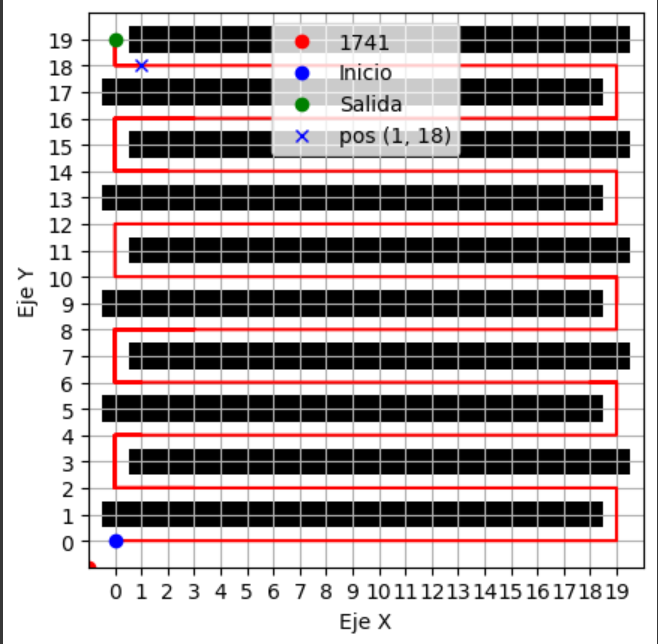

In [ ]:
# Extraer las estadísticas de cada generación
generaciones = logbook.select("gen")
minimos = logbook.select("min")
promedios = logbook.select("avg")

# Graficar la evolución
import matplotlib.pyplot as plt

plt.plot(generaciones, minimos, label="Mejor aptitud")
plt.plot(generaciones, promedios, label="Aptitud promedio", linestyle="--")
plt.xlabel("Generaciones")
plt.ylabel("Aptitud")
plt.title("Evolución del Algoritmo Genético")
plt.legend()
plt.show()

#Desarrollo del taller
* Se implementó una estrategia ambiciosa buscando optimizar tres aspectos simultáneamente:
Minimizar la distancia euclidiana entre la posición final del individuo y la salida del laberinto.
Maximizar la distancia euclidiana entre la posición final del individuo y el punto de inicio del laberinto.
Alcanzar el mayor valor posible en la coordenada Y dentro del laberinto.
La función de aptitud fue diseñada para devolver una tupla con tres valores correspondientes a estos objetivos, y los pesos (weights) en la configuración de DEAP se ajustaron en consecuencia para indicar la dirección de optimización (minimizar o maximizar) para cada uno.
* Esta estrategia resultó ser ineficiente en términos de tiempo de procesamiento debido a la complejidad de evaluar y comparar individuos basándose en tres objetivos.
El problema más crítico fue el estancamiento de la población. Se observó que los individuos tendían a acumularse en las esquinas del laberinto, sin lograr explorar efectivamente el camino hacia la salida. Esto limitó severamente el progreso evolutivo y demostró que esta combinación de objetivos no era adecuada para resolver el laberinto de manera eficiente.
* Se simplificó drásticamente la función de aptitud para enfocarse en un único objetivo: maximizar el valor de la coordenada Y de la posición final del individuo.
La lógica detrás de esto era que, si el individuo lograba avanzar en la dirección Y, eventualmente podría acercarse a la fila donde se encuentra la salida (aunque la salida estaba en la fila 0 en el laberinto de 20x20 mencionado posteriormente, este objetivo podría haber sido relevante en un laberinto diferente o como una heurística inicial).
* Este enfoque de maximizar Y mostró un avance más notorio en comparación con el intento multi-objetivo, indicando que la simplificación de la aptitud ayudó al algoritmo a hacer algún progreso.
Sin embargo, no fue suficiente para garantizar la resolución completa del laberinto. Los individuos podían maximizar su posición en Y pero aún así quedarse atascados en paredes o áreas que no llevaban a la salida.
* Se reorientó la estrategia de aptitud hacia la exploración. Inicialmente, se pensó en penalizar al individuo cada vez que visitaba una celda que ya había visitado durante su recorrido (evitando rutas repetitivas).
Tras la implementación y análisis, se constató que penalizar las celdas visitadas era funcionalmente equivalente a maximizar la cantidad total de celdas nuevas visitadas por el individuo a lo largo de su ruta.
Dada esta equivalencia, se simplificó la función de aptitud a contar y maximizar únicamente el número de posiciones únicas visitadas por la ruta generada por el individuo.
* Con la estrategia de maximizar posiciones nuevas, se hizo evidente que la longitud de la secuencia de movimientos definidos para cada individuo era un factor limitante crucial.
Aunque teóricamente el camino más corto en un laberinto de 20x20 podría requerir alrededor de 210 movimientos, el algoritmo genético con esta heurística de exploración requirió que cada individuo tuviera una capacidad de 2000 movimientos para poder encontrar una ruta que resolviera el laberinto. Longitudes menores no fueron suficientes.
* Una vez establecida la longitud del individuo en 2000 movimientos, el algoritmo genético logró solucionar el laberinto de manera efectiva.
 * La convergencia hacia una solución se produjo relativamente rápido dentro del contexto del algoritmo genético: se necesitó solo 30 de las 50 generaciones configuradas y una población de 800 individuos por generación.
* Se contrastaron estos resultados con un experimento previo que utilizó individuos de 1000 movimientos.
Aunque este intento también utilizó poblaciones y generaciones elevadas (1000 individuos y 1000 generaciones), no logró resolver el laberinto. La mejor solución encontrada se quedó a aproximadamente 26 movimientos de alcanzar la salida. Esto reforzó la conclusión de que la longitud del individuo (2000 movimientos) fue determinante para la resolución con esta estrategia de aptitud.
* Se intentaron configuraciones con parámetros aún mayores para ver si se podía mejorar la eficiencia o encontrar soluciones con menos movimientos: se probaron hasta 2500 generaciones con poblaciones de 2000 individuos.
Sin embargo, el tiempo de ejecución de estas configuraciones se volvió prohibitivamente largo. El entorno de Google Colab a menudo se desconectaba debido a la inactividad antes de que el algoritmo pudiera completar un número significativo de generaciones, impidiendo la evaluación de estos escenarios a mayor escala y dejando sin respuesta si habrían conducido a soluciones diferentes o más eficientes.


#Analisis y solucion de preguntas:

* ¿Cómo afecta el tamaño de la población?
  *  Como pudimos ver a lo largo del taller,  a mayor poblacion el espacio de busqueda tiende a ser más exaustivo dando mejores resultados, sin embargo asi mismo tambien genera más calculos por lo que necesita de más procesamiento y en consecuencia tiempo de computo.
  Esto se pudo ver en el comando pop = toolbox.population(n=100) donde se provaron con diferentes cantidasdes que estuvieron entre 100 y 2500. En conclusion, es mejor tener poblaciones más grandes segun que tan complejo sea el problema y el costo computacional que este dispuesto a darsele.
  
  
  

* ¿Cómo afecta la cantidad de generaciones?
  * La cantidad de generaciones define cuántas veces se itera el ciclo de selección, cruce y mutación sobre la población. Cada generación representa un paso en la "evolución" de la población, donde se busca que los individuos se acerquen progresivamente a la solución óptima, ya sea minimizando o maximizando la función de aptitud.
  
  * Sin embargo, es importante destacar que a medida que la población se acerca a una solución óptima, la tasa de mejora tiende a disminuir. Eventualmente, la aptitud puede estancarse, lo que significa que las nuevas generaciones no producen individuos significativamente mejores. En este punto, continuar aumentando el número de generaciones podría considerarse un desperdicio de recursos computacionales, ya que las mejoras obtenidas son marginales.

  * En el taller, se experimentó con diferentes valores para la cantidad de generaciones, llegando incluso a 2500. Se observó que, en algunos casos, la aptitud se estancaba después de un cierto número de generaciones, confirmando la importancia de encontrar un equilibrio entre la exploración del espacio de búsqueda y el uso eficiente de los recursos.

* ¿Cómo afectan el cruce y las mutaciones?
  * Las mutaciones al introducir pequeños cambios aleatorios en los individuos de la población, mostor que las mutaciones permitían mejorar gradualmente la aptitud de las generaciones. Sin embargo, mutaciones con una probabilidad muy alta podrían generar individuos con un peor desempeño. Por lo tanto, se optó por utilizar una probabilidad de mutación del 0.1, buscando un equilibrio entre la exploración y la preservación de las buenas soluciones.
  * El  cruce combina la información genética de dos individuos para crear descendencia. La elección del método de cruce impacta significativamente en el rendimiento del algoritmo.
  *En el taller, se observó que el tipo de función de aptitud influía en la efectividad del cruce. Finalmente, se obtuvo un mejor resultado utilizando una función uniobjetivo que priorizaba la exploración de nuevas posiciones en el laberinto y se seleccionaran los 3 mejores individuos para pasar sus genes, lo que condujo a la solución. Este enfoque permitió explotar la capacidad del cruce para combinar soluciones parciales y generar individuos con un mayor recorrido, acercándose a la solución óptima.

* ¿Qué observa sobre la eficiencia del algoritmo genético?
  * Al aumentar el tamaño de la población y la cantidad de generaciones, el tiempo de procesamiento crecía considerablemente. Esto demuestra que, si bien una mayor exploración del espacio de búsqueda puede mejorar la calidad de la solución, también puede resultar en un costo computacional significativo. Por lo tanto, es crucial encontrar un equilibrio entre la exhaustividad de la búsqueda y la eficiencia del algoritmo, ajustando los parámetros para lograr un tiempo de ejecución razonable.
  * En el taller, se noto que  la eficiencia del algoritmo genético depende de varias cosas, como el tamaño de la población, el número de generaciones, la probabilidad de mutación y el tipo de cruce que se usa. Más individuos y generaciones = más tiempo. Esto pasa porque tiene que analizar muchas opciones, y eso toma tiempo.
  * No existe una configuración que funcione perfecto para todos los problemas. Se noto que la forma en que se cruzan los individuos y la probabilidad de mutación influyen mucho en el resultado.
  * La velocidad con la que el algoritmo encuentra una solución aceptable también es un indicador de su eficiencia. Se observó que, en algunos casos, el algoritmo convergía rápidamente a una solución, mientras que en otros requería más generaciones para alcanzar un resultado satisfactorio. La complejidad del problema, la función de aptitud utilizada y la configuración del algoritmo influyen en la velocidad de convergencia.
  

